In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from pathlib import Path

In [69]:
path = '../../parsers/official/data/df_main.csv'
df = pd.read_csv(Path(path).resolve())
pd.set_option('display.max_columns', None)
df.head()

/tmp/ipykernel_13511/1336842680.py:2: DtypeWarning: Columns (39,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path(path).resolve())


,match_id,gameweek_id,gameweek_compSeason_label,gameweek_compSeason_competition_abbreviation,gameweek_compSeason_competition_description,gameweek_compSeason_competition_level,gameweek_compSeason_competition_source,gameweek_compSeason_competition_id,gameweek_compSeason_id,gameweek_gameweek,kickoff_completeness,kickoff_millis,kickoff_label,provisionalKickoff_completeness,provisionalKickoff_millis,provisionalKickoff_label,teams_team_1_name,teams_team_1_club_name,teams_team_1_club_shortName,teams_team_1_club_abbr,teams_team_1_club_id,teams_team_1_teamType,teams_team_1_shortName,teams_team_1_id,teams_score_1,teams_team_2_name,teams_team_2_club_name,teams_team_2_club_shortName,teams_team_2_club_abbr,teams_team_2_club_id,teams_team_2_teamType,teams_team_2_shortName,teams_team_2_id,teams_score_2,replay,ground_name,ground_city,ground_source,ground_id,neutralGround,status,phase,outcome,attendance,clock_secs,clock_label,fixtureType,extraTime,shootout,behindClosedDoors,id,team_1_formation_used,team_1_accurate_back_zone_pass,team_1_total_back_zone_pass,team_1_accurate_pass,team_1_touches,team_1_total_pass,team_1_backward_pass,team_1_successful_open_play_pass,team_1_open_play_pass,team_1_possession_percentage,team_1_leftside_pass,team_1_accurate_fwd_zone_pass,team_1_rightside_pass,team_1_total_long_balls,team_1_total_fwd_zone_pass,team_1_touches_in_opp_box,team_1_final_third_entries,team_1_crosses_18yard,team_1_successful_final_third_passes,team_1_accurate_cross,team_1_long_pass_own_to_opp,team_1_fwd_pass,team_1_total_cross_nocorner,team_1_total_cross,team_1_total_final_third_passes,team_1_long_pass_own_to_opp_success,team_1_poss_lost_all,team_1_poss_lost_ctrl,team_1_pen_area_entries,team_1_passes_left,team_1_accurate_long_balls,team_1_crosses_18yardplus,team_1_accurate_cross_nocorner,team_1_attempts_ibox,team_1_total_scoring_att,team_1_att_openplay,team_1_att_lf_target,team_1_att_bx_centre,team_1_ontarget_scoring_att,team_1_ball_recovery,team_1_att_lf_total,team_1_poss_won_att_3rd,team_1_att_ibox_target,team_1_ontarget_att_assist,team_1_blocked_pass,team_1_total_att_assist,team_1_duel_won,team_1_won_contest,team_1_att_sv_low_centre,team_1_successful_put_through,team_1_total_contest,team_1_att_assist_openplay,team_1_put_through,team_1_poss_won_mid_3rd,team_1_total_tackle,team_1_interception,team_1_interception_won,team_1_won_tackle,team_1_total_offside,team_1_duel_lost,team_1_accurate_layoffs,team_1_passes_right,team_1_total_chipped_pass,team_1_total_layoffs,team_1_accurate_chipped_pass,team_1_aerial_lost,team_1_effective_clearance,team_1_lost_corners,team_1_total_launches,team_1_total_clearance,team_1_attempts_conceded_ibox,team_1_fk_foul_won,team_1_poss_won_def_3rd,team_1_saved_ibox,team_1_saves,team_1_diving_save,team_1_challenge_lost,team_1_dispossessed,team_1_unsuccessful_touch,team_1_goal_kicks,team_1_accurate_goal_kicks,team_1_total_keeper_sweeper,team_1_attempts_conceded_obox,team_1_head_clearance,team_1_accurate_keeper_sweeper,team_1_effective_head_clearance,team_1_fk_foul_lost,team_1_attempted_tackle_foul,team_1_aerial_won,team_1_penalty_conceded,team_1_pen_goals_conceded,team_1_goals_conceded_ibox,team_1_goals_conceded,team_1_penalty_faced,team_1_total_yel_card,team_1_shot_off_target,team_1_total_throws,team_1_att_rf_total,team_1_accurate_throws,team_1_att_fastbreak,team_1_att_ibox_miss,team_1_total_fastbreak,team_1_shot_fastbreak,team_1_offtarget_att_assist,team_1_att_cmiss_high_right,team_1_att_miss_high_right,team_1_saved_obox,team_1_outfielder_block,team_1_att_rf_target,team_1_corner_taken,team_1_won_corners,team_1_att_sv_high_centre,team_1_accurate_corners_intobox,team_1_att_assist_setplay,team_1_att_miss_right,team_1_att_corner,team_1_total_corners_intobox,team_1_att_hd_total,team_1_att_hd_miss,team_1_effective_blocked_cross,team_1_blocked_cross,team_1_subs_made,team_1_accurate_launches,team_1_fouled_final_third,team_1_att_obx_centre,team_1_attempts_obox,team_1_att_obox_target,team_1_keeper_throws,team_1_accurate_keeper_thr

In [8]:
df['behindClosedDoors'].unique()

array([False, True, nan], dtype=object)

In [9]:
#Удалим колонки которые не несут никакой информации: дублируются, либо 1 значение
del_col = [
    'gameweek_compSeason_competition_source',
    'gameweek_compSeason_competition_level',
    'gameweek_compSeason_competition_description',
    'gameweek_compSeason_competition_abbreviation',
    'gameweek_compSeason_competition_id',
    'ground_source',
    'kickoff_completeness',
    'provisionalKickoff_completeness',
    'teams_team_1_club_name',
    'teams_team_1_club_shortName',
    'teams_team_1_teamType',
    'teams_team_1_shortName',
    'teams_team_1_id',
    'teams_team_2_club_name',
    'teams_team_2_club_shortName',
    'teams_team_2_teamType',
    'teams_team_2_shortName',
    'teams_team_2_id',
    'neutralGround',
    'replay',
    'status',
    'phase',
    'fixtureType',
    'extraTime',
    'shootout',
]
df.drop(del_col, axis=1, inplace=True)

In [10]:
df.shape

(3623, 324)

In [11]:
df.isna().sum().to_dict()

{'match_id': 0,
 'gameweek_id': 0,
 'gameweek_compSeason_label': 0,
 'gameweek_compSeason_id': 0,
 'gameweek_gameweek': 0,
 'kickoff_millis': 0,
 'kickoff_label': 0,
 'provisionalKickoff_millis': 0,
 'provisionalKickoff_label': 0,
 'teams_team_1_name': 0,
 'teams_team_1_club_abbr': 0,
 'teams_team_1_club_id': 0,
 'teams_score_1': 0,
 'teams_team_2_name': 0,
 'teams_team_2_club_abbr': 0,
 'teams_team_2_club_id': 0,
 'teams_score_2': 0,
 'ground_name': 0,
 'ground_city': 0,
 'ground_id': 0,
 'outcome': 0,
 'attendance': 450,
 'clock_secs': 0,
 'clock_label': 0,
 'behindClosedDoors': 380,
 'id': 0,
 'team_1_formation_used': 0,
 'team_1_accurate_back_zone_pass': 0,
 'team_1_total_back_zone_pass': 0,
 'team_1_accurate_pass': 0,
 'team_1_touches': 0,
 'team_1_total_pass': 0,
 'team_1_backward_pass': 0,
 'team_1_successful_open_play_pass': 0,
 'team_1_open_play_pass': 0,
 'team_1_possession_percentage': 0,
 'team_1_leftside_pass': 0,
 'team_1_accurate_fwd_zone_pass': 0,
 'team_1_rightside_pas

In [12]:
df[['team_1_losses', 'team_2_wins', 'teams_score_1', 'teams_score_2']]


,team_1_losses,team_2_wins,teams_score_1,teams_score_2
0,NaN,NaN,2,2
1,NaN,NaN,0,0
2,1.0,1.0,2,3
3,NaN,NaN,1,0
4,NaN,NaN,1,1
...,...,...,...,...
3618,1.0,1.0,0,1
3619,1.0,1.0,0,1
3620,NaN,NaN,2,2
3621,1.0,1.0,0,1


Заполним колонки team_1_losses, team_2_wins и создадим признак draw исходя из данных teams_score_1, teams_score_2
Так же тяжело интепритировать результать с колонками поражение 1 команды и победа 2 команды, дополнительно создадим победа 1 команды

In [13]:
df['team_1_losses'] = np.where(df['teams_score_1'] < df['teams_score_2'], 1, 0)
df['team_2_wins'] = np.where(df['teams_score_1'] < df['teams_score_2'], 1, 0)
df['draw'] = np.where(df['teams_score_1'] == df['teams_score_2'], 1, 0)
df['team_1_wins'] = np.where(df['teams_score_1'] > df['teams_score_2'], 1, 0)
df['team_2_losses'] = np.where(df['teams_score_1'] > df['teams_score_2'], 1, 0)

In [14]:
df[['team_1_losses', 'team_1_wins', 'team_2_wins', 'teams_score_1', 'teams_score_2', 'draw']]

,team_1_losses,team_1_wins,team_2_wins,teams_score_1,teams_score_2,draw
0,0,0,0,2,2,1
1,0,0,0,0,0,1
2,1,0,1,2,3,0
3,0,1,0,1,0,0
4,0,0,0,1,1,1
...,...,...,...,...,...,...
3618,1,0,1,0,1,0
3619,1,0,1,0,1,0
3620,0,0,0,2,2,1
3621,1,0,1,0,1,0


In [15]:
df.dropna(axis=1, thresh=1000, inplace=True)
df.shape

(3623, 310)

Команда 1 играет дома

In [16]:
path = 'eda_data/stadium.csv'
df_st = pd.read_csv(Path(path).resolve())
pd.set_option('display.max_columns', None)
df_st.head()

,club,club_id,stadium,stadium_id,city,capacity,latitude,longitude
0,Arsenal,1.0,Emirates Stadium,52.0,London,60272.0,51.554800,-0.108533
1,Aston Villa,2.0,Villa Park,43.0,Birmingham,42682.0,52.508500,-1.884950
2,Bournemouth,127.0,Vitality Stadium,914.0,Bournemouth,11464.0,50.734900,-1.838990
3,Brentford,130.0,Gtech Community Stadium,4003.0,Brentford,17250.0,51.490833,0.288611
4,Burnley,43.0,Turf Moor,47.0,Burnley,21401.0,53.788500,-2.231490


In [17]:
df_st[df_st['stadium']=='Villa Park']

,club,club_id,stadium,stadium_id,city,capacity,latitude,longitude
1,Aston Villa,2.0,Villa Park,43.0,Birmingham,42682.0,52.5085,-1.88495


In [18]:
df['team_id_home'] = df['ground_name'].apply(lambda x: df_st[df_st['stadium']==x]['club_id'].values[0] if\
                                           df_st[df_st['stadium']==x]['club_id'].shape[0] > 0 else None)

In [19]:
df['team_id_home'].isna().sum()

324

In [20]:
['Bramall Lane',
 'Kenilworth Road',
 'Goldsands Stadium',
 'KCOM Stadium',
 'Loftus Road']

['Bramall Lane',
 'Kenilworth Road',
 'Goldsands Stadium',
 'KCOM Stadium',
 'Loftus Road']

Посмотрим на распределение побед домашней, гостевой команд и ничьи

In [21]:
df[['team_1_wins', 'team_2_wins', 'draw']].sum()

team_1_wins    1629
team_2_wins    1150
draw            844
dtype: int64

In [22]:
#Сделаем два датасета по выигранным играм (дома и в гостях)
df_gr_1 = df.groupby(by='teams_team_1_name', as_index=False).sum()[['teams_team_1_name', 'team_1_wins', 'team_1_losses']]

df_gr_2 = df.groupby(by='teams_team_2_name', as_index=False).sum()[['teams_team_2_name', 'team_2_wins', 'team_2_losses']]

In [23]:
#Посмотрим на количество побед и поражений по командам, а так же найдем "процент" побед

df_gr = df_gr_1.merge(df_gr_2, left_on='teams_team_1_name', right_on='teams_team_2_name')\
    [['teams_team_1_name', 'team_1_wins', 'team_2_wins', 'team_1_losses', 'team_2_losses']]
df_gr['wins'] = df_gr['team_1_wins'] + df_gr['team_2_wins']
df_gr['losses'] = df_gr['team_1_losses'] + df_gr['team_2_losses']
df_gr['per_wins'] = df_gr['wins'] / (df_gr['wins'] + df_gr['losses'])
df_gr.drop(['team_1_wins', 'team_2_wins', 'team_1_losses', 'team_2_losses'], axis=1, inplace=True)
df_gr.sort_values(by='per_wins', ascending=False, inplace=True)
df_gr

,teams_team_1_name,wins,losses,per_wins
17,Manchester City,253,55,0.821429
15,Liverpool,219,58,0.790614
18,Manchester United,189,84,0.692308
0,Arsenal,197,92,0.681661
7,Chelsea,190,89,0.681004
29,Tottenham Hotspur,196,95,0.673540
14,Leicester City,134,131,0.505660
33,Wolverhampton Wanderers,77,83,0.481250
32,West Ham United,131,142,0.479853
3,Brentford,33,37,0.471429


In [24]:
df['gameweek_compSeason_label'] = df['gameweek_compSeason_label'].apply(lambda x: x[:4])

In [25]:
list_ = list(df.columns)
list_
list_feature = []
for i in list_:
    if 'team_1_' in i:
        if re.sub(r'^team_1_', r'team_2_', i) in list_ and re.sub(r'^team_1_', r'team_2_', i) != i:
            list_feature.append([i, re.sub(r'^team_1_', r'team_2_', i)])

In [26]:
df['team_1_hue'] = np.where(df['team_1_wins']==1, 1,\
                            np.where(df['draw']==1, 2, 0)) #Выиграла команда 1 -1, проиграла -0, ничья - 2
df.fillna(0)

,match_id,gameweek_id,gameweek_compSeason_label,gameweek_compSeason_id,gameweek_gameweek,kickoff_millis,kickoff_label,provisionalKickoff_millis,provisionalKickoff_label,teams_team_1_name,teams_team_1_club_abbr,teams_team_1_club_id,teams_score_1,teams_team_2_name,teams_team_2_club_abbr,teams_team_2_club_id,teams_score_2,ground_name,ground_city,ground_id,outcome,attendance,clock_secs,clock_label,behindClosedDoors,id,team_1_formation_used,team_1_accurate_back_zone_pass,team_1_total_back_zone_pass,team_1_accurate_pass,team_1_touches,team_1_total_pass,team_1_backward_pass,team_1_successful_open_play_pass,team_1_open_play_pass,team_1_possession_percentage,team_1_leftside_pass,team_1_accurate_fwd_zone_pass,team_1_rightside_pass,team_1_total_long_balls,team_1_total_fwd_zone_pass,team_1_touches_in_opp_box,team_1_final_third_entries,team_1_crosses_18yard,team_1_successful_final_third_passes,team_1_accurate_cross,team_1_long_pass_own_to_opp,team_1_fwd_pass,team_1_total_cross_nocorner,team_1_total_cross,team_1_total_final_third_passes,team_1_long_pass_own_to_opp_success,team_1_poss_lost_all,team_1_poss_lost_ctrl,team_1_pen_area_entries,team_1_passes_left,team_1_accurate_long_balls,team_1_crosses_18yardplus,team_1_accurate_cross_nocorner,team_1_attempts_ibox,team_1_total_scoring_att,team_1_att_openplay,team_1_att_lf_target,team_1_att_bx_centre,team_1_ontarget_scoring_att,team_1_ball_recovery,team_1_att_lf_total,team_1_poss_won_att_3rd,team_1_att_ibox_target,team_1_ontarget_att_assist,team_1_blocked_pass,team_1_total_att_assist,team_1_duel_won,team_1_won_contest,team_1_att_sv_low_centre,team_1_successful_put_through,team_1_total_contest,team_1_att_assist_openplay,team_1_put_through,team_1_poss_won_mid_3rd,team_1_total_tackle,team_1_interception,team_1_interception_won,team_1_won_tackle,team_1_total_offside,team_1_duel_lost,team_1_accurate_layoffs,team_1_passes_right,team_1_total_chipped_pass,team_1_total_layoffs,team_1_accurate_chipped_pass,team_1_aerial_lost,team_1_effective_clearance,team_1_lost_corners,team_1_total_launches,team_1_total_clearance,team_1_attempts_conceded_ibox,team_1_fk_foul_won,team_1_poss_won_def_3rd,team_1_saved_ibox,team_1_saves,team_1_diving_save,team_1_challenge_lost,team_1_dispossessed,team_1_unsuccessful_touch,team_1_goal_kicks,team_1_accurate_goal_kicks,team_1_total_keeper_sweeper,team_1_attempts_conceded_obox,team_1_head_clearance,team_1_accurate_keeper_sweeper,team_1_effective_head_clearance,team_1_fk_foul_lost,team_1_attempted_tackle_foul,team_1_aerial_won,team_1_goals_conceded_ibox,team_1_goals_conceded,team_1_total_yel_card,team_1_shot_off_target,team_1_total_throws,team_1_att_rf_total,team_1_accurate_throws,team_1_att_fastbreak,team_1_att_ibox_miss,team_1_total_fastbreak,team_1_shot_fastbreak,team_1_offtarget_att_assist,team_1_att_miss_high_right,team_1_saved_obox,team_1_outfielder_block,team_1_att_rf_target,team_1_corner_taken,team_1_won_corners,team_1_att_sv_high_centre,team_1_accurate_corners_intobox,team_1_att_assist_setplay,team_1_att_miss_right,team_1_att_corner,team_1_total_corners_intobox,team_1_att_hd_total,team_1_att_hd_miss,team_1_effective_blocked_cross,team_1_blocked_cross,team_1_subs_made,team_1_accurate_launches,team_1_fouled_final_third,team_1_att_obx_centre,team_1_attempts_obox,team_1_att_obox_target,team_1_keeper_throws,team_1_accurate_keeper_throws,team_1_total_through_ball,team_1_big_chance_missed,team_1_big_chance_created,team_1_att_miss_left,team_1_accurate_through_ball,team_1_blocked_scoring_att,team_1_att_ibox_blocked,team_1_total_flick_on,team_1_losses,team_1_att_cmiss_left,team_2_formation_used,team_2_open_play_pass,team_2_leftside_pass,team_2_accurate_goal_kicks,team_2_possession_percentage,team_2_poss_lost_all,team_2_goal_kicks,team_2_poss_lost_ctrl,team_2_total_pass,team_2_total_long_balls,team_2_total_back_zone_pass,team_2_total_chipped_pass,team_2_successful_open_play_pass,team_2_accurate_long_balls,team_2_accurate_back_zone_pass,team_2_rightside_pass,team_2_unsuccessful_touch

<Axes: xlabel='team_1_total_back_zone_pass', ylabel='team_2_total_back_zone_pass'>

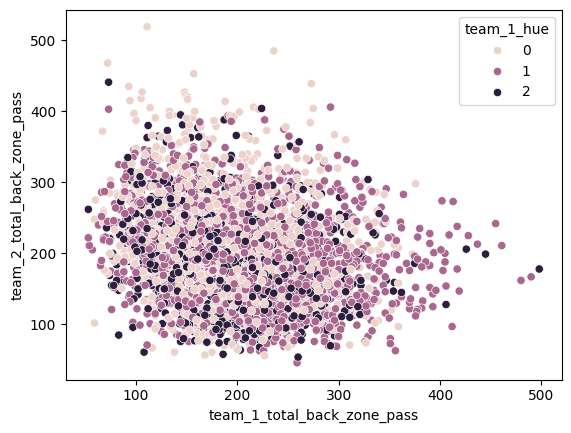

In [27]:
sns.scatterplot(data=df, x='team_1_total_back_zone_pass', y='team_2_total_back_zone_pass', hue='team_1_hue')

In [28]:
df_gr.to_csv('eda_data/game_sum.csv', index=False)
df.to_csv('eda_data/games.csv', index=False)

df_gr.to_csv(Path('eda_data/game_sum.csv').resolve(), index=False)
df.to_csv(Path('eda_data/games.csv').resolve(), index=False)

In [36]:
col = df.columns
list(col).index('team_1_formation_used')

26

In [44]:
df.fillna(0, inplace=True)

In [59]:
df_c = df.iloc[:, 26:]


/tmp/ipykernel_13511/3612371556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['team_1_hue'].map(class_mapping), data=df, palette='viridis', legend=True)


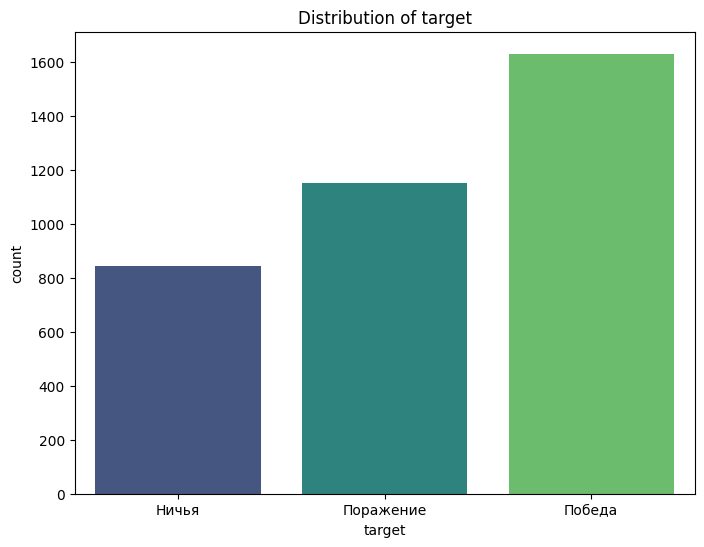

In [52]:
plt.figure(figsize=(8, 6))
class_mapping = {0: 'Поражение', 1: 'Победа', 2: 'Ничья'}
sns.countplot(x=df['team_1_hue'].map(class_mapping), data=df, palette='viridis', legend=True)

plt.title(f'Distribution of target')
plt.xlabel('target')
plt.show()

In [47]:
df_c

,team_1_formation_used,team_1_accurate_back_zone_pass,team_1_total_back_zone_pass,team_1_accurate_pass,team_1_touches,team_1_total_pass,team_1_backward_pass,team_1_successful_open_play_pass,team_1_open_play_pass,team_1_possession_percentage,team_1_leftside_pass,team_1_accurate_fwd_zone_pass,team_1_rightside_pass,team_1_total_long_balls,team_1_total_fwd_zone_pass,team_1_touches_in_opp_box,team_1_final_third_entries,team_1_crosses_18yard,team_1_successful_final_third_passes,team_1_accurate_cross,team_1_long_pass_own_to_opp,team_1_fwd_pass,team_1_total_cross_nocorner,team_1_total_cross,team_1_total_final_third_passes,team_1_long_pass_own_to_opp_success,team_1_poss_lost_all,team_1_poss_lost_ctrl,team_1_pen_area_entries,team_1_passes_left,team_1_accurate_long_balls,team_1_crosses_18yardplus,team_1_accurate_cross_nocorner,team_1_attempts_ibox,team_1_total_scoring_att,team_1_att_openplay,team_1_att_lf_target,team_1_att_bx_centre,team_1_ontarget_scoring_att,team_1_ball_recovery,team_1_att_lf_total,team_1_poss_won_att_3rd,team_1_att_ibox_target,team_1_ontarget_att_assist,team_1_blocked_pass,team_1_total_att_assist,team_1_duel_won,team_1_won_contest,team_1_att_sv_low_centre,team_1_successful_put_through,team_1_total_contest,team_1_att_assist_openplay,team_1_put_through,team_1_poss_won_mid_3rd,team_1_total_tackle,team_1_interception,team_1_interception_won,team_1_won_tackle,team_1_total_offside,team_1_duel_lost,team_1_accurate_layoffs,team_1_passes_right,team_1_total_chipped_pass,team_1_total_layoffs,team_1_accurate_chipped_pass,team_1_aerial_lost,team_1_effective_clearance,team_1_lost_corners,team_1_total_launches,team_1_total_clearance,team_1_attempts_conceded_ibox,team_1_fk_foul_won,team_1_poss_won_def_3rd,team_1_saved_ibox,team_1_saves,team_1_diving_save,team_1_challenge_lost,team_1_dispossessed,team_1_unsuccessful_touch,team_1_goal_kicks,team_1_accurate_goal_kicks,team_1_total_keeper_sweeper,team_1_attempts_conceded_obox,team_1_head_clearance,team_1_accurate_keeper_sweeper,team_1_effective_head_clearance,team_1_fk_foul_lost,team_1_attempted_tackle_foul,team_1_aerial_won,team_1_goals_conceded_ibox,team_1_goals_conceded,team_1_total_yel_card,team_1_shot_off_target,team_1_total_throws,team_1_att_rf_total,team_1_accurate_throws,team_1_att_fastbreak,team_1_att_ibox_miss,team_1_total_fastbreak,team_1_shot_fastbreak,team_1_offtarget_att_assist,team_1_att_miss_high_right,team_1_saved_obox,team_1_outfielder_block,team_1_att_rf_target,team_1_corner_taken,team_1_won_corners,team_1_att_sv_high_centre,team_1_accurate_corners_intobox,team_1_att_assist_setplay,team_1_att_miss_right,team_1_att_corner,team_1_total_corners_intobox,team_1_att_hd_total,team_1_att_hd_miss,team_1_effective_blocked_cross,team_1_blocked_cross,team_1_subs_made,team_1_accurate_launches,team_1_fouled_final_third,team_1_att_obx_centre,team_1_attempts_obox,team_1_att_obox_target,team_1_keeper_throws,team_1_accurate_keeper_throws,team_1_total_through_ball,team_1_big_chance_missed,team_1_big_chance_created,team_1_att_miss_left,team_1_accurate_through_ball,team_1_blocked_scoring_att,team_1_att_ibox_blocked,team_1_total_flick_on,team_1_losses,team_1_att_cmiss_left,team_2_formation_used,team_2_open_play_pass,team_2_leftside_pass,team_2_accurate_goal_kicks,team_2_possession_percentage,team_2_poss_lost_all,team_2_goal_kicks,team_2_poss_lost_ctrl,team_2_total_pass,team_2_total_long_balls,team_2_total_back_zone_pass,team_2_total_chipped_pass,team_2_successful_open_play_pass,team_2_accurate_long_balls,team_2_accurate_back_zone_pass,team_2_rightside_pass,team_2_unsuccessful_touch,team_2_accurate_pass,team_2_accurate_chipped_pass,team_2_touches,team_2_attempts_conceded_ibox,team_2_saves,team_2_saved_ibox,team_2_ball_recovery,team_2_challenge_lost,team_2_backward_pass,team_2_successful_final_third_passes,team_2_interception_won,team_2_duel_lost,team_2_total_fwd_zone_pass,team_2_total_layoffs,team_2_total_final_third_passes,team_2_fwd_pass,team_2_accurate_layoffs,team_2_long_pass_own_to_opp,

In [65]:
correlation_matrix = df_c.corr()[['team_1_hue']]
col_cor = correlation_matrix.sort_values(by='team_1_hue', ascending=False, key=abs).index[4:40]

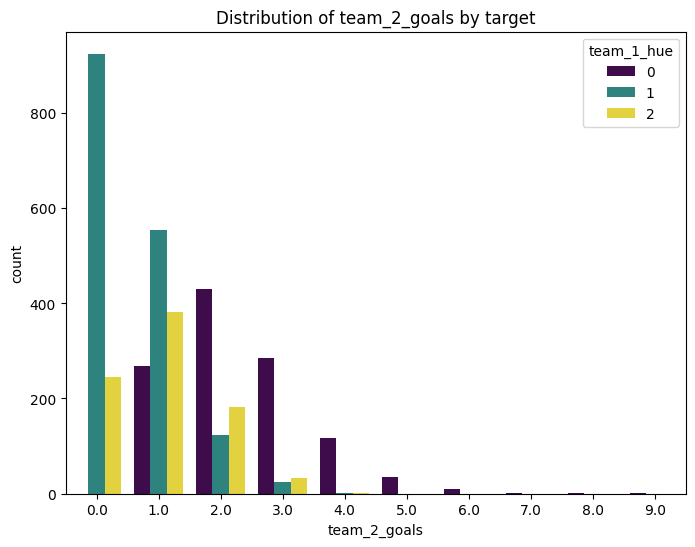

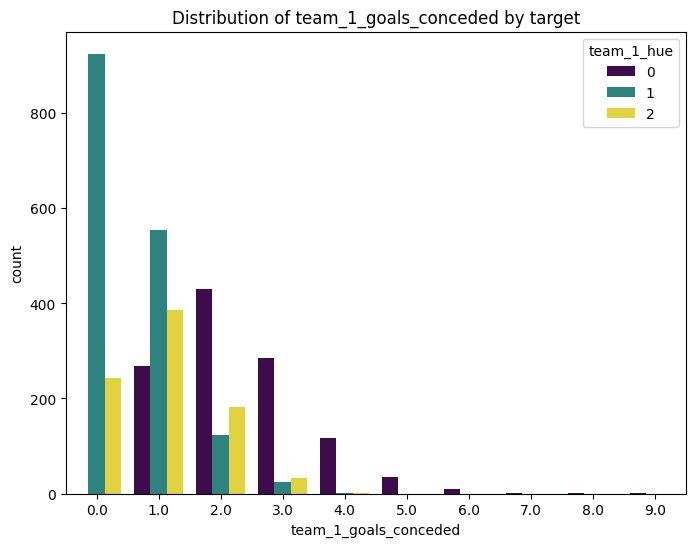

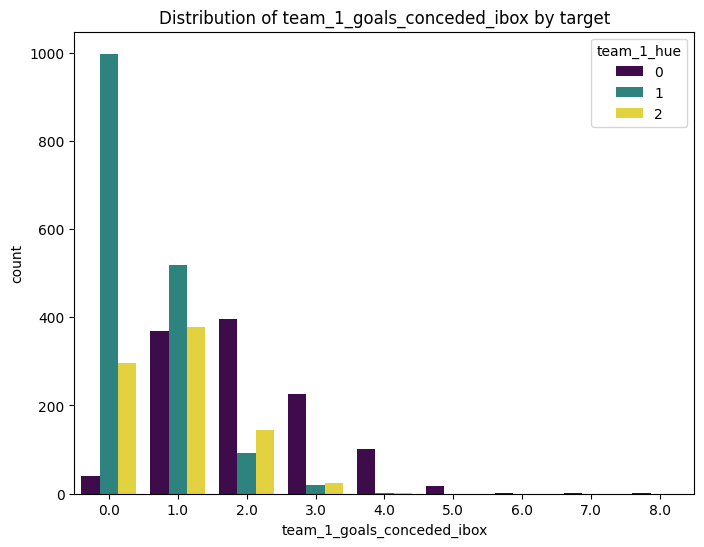

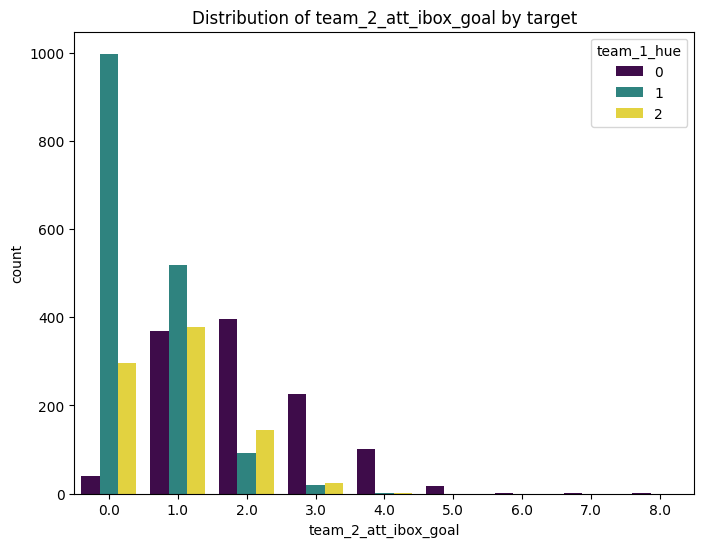

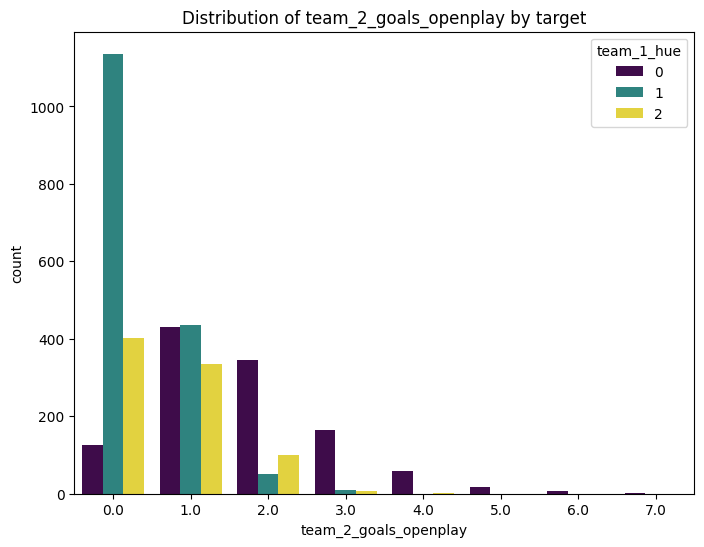

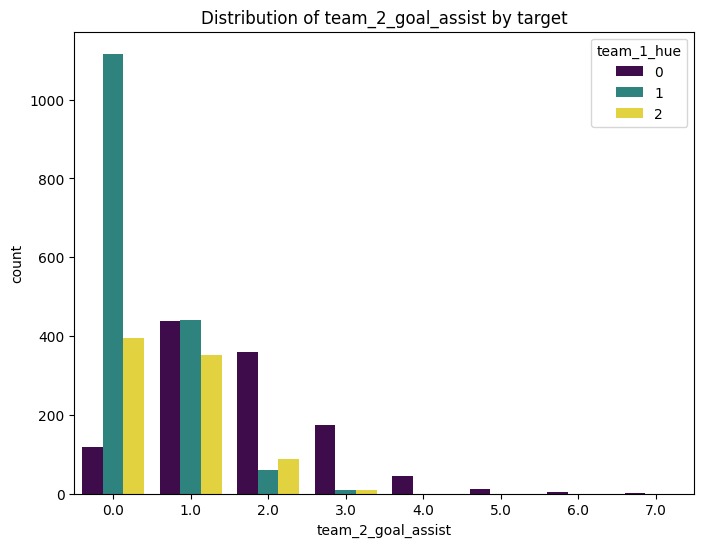

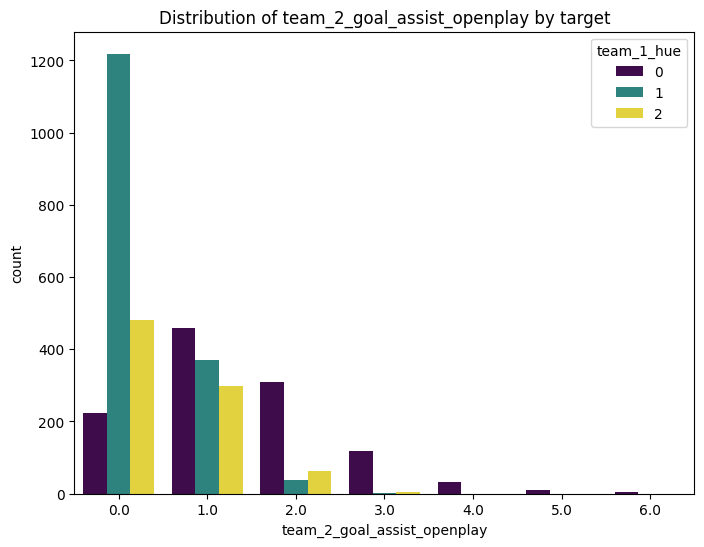

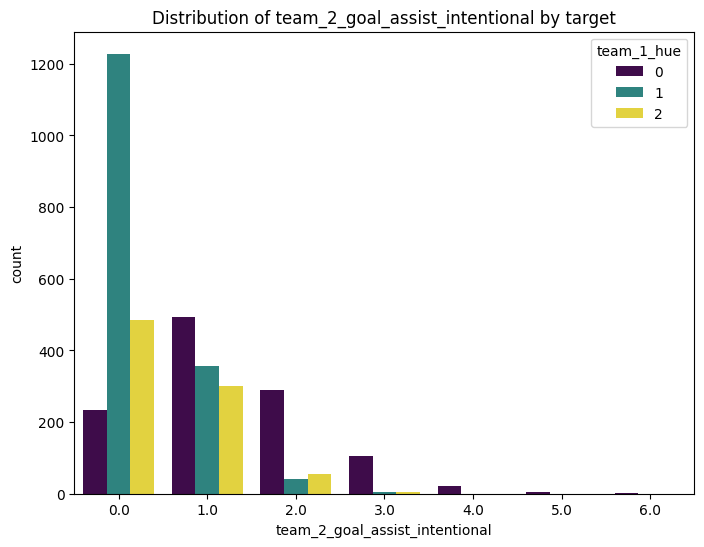

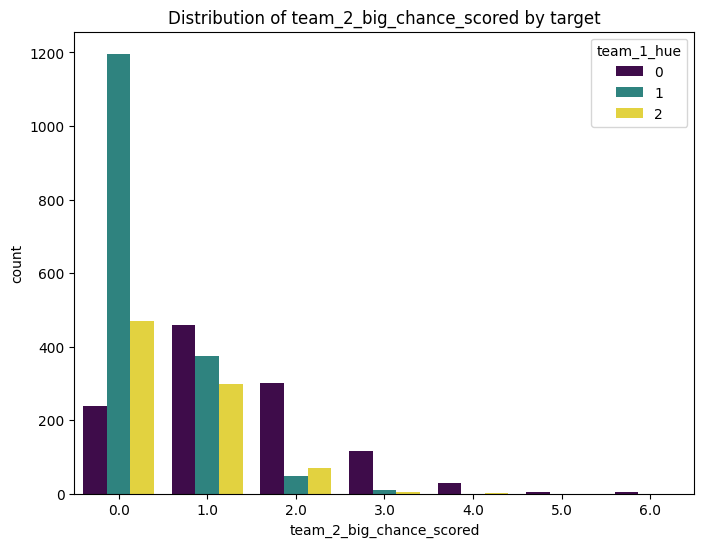

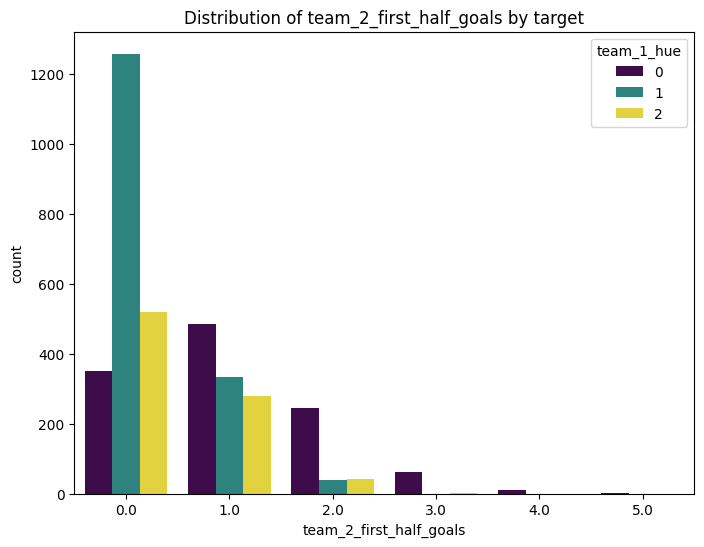

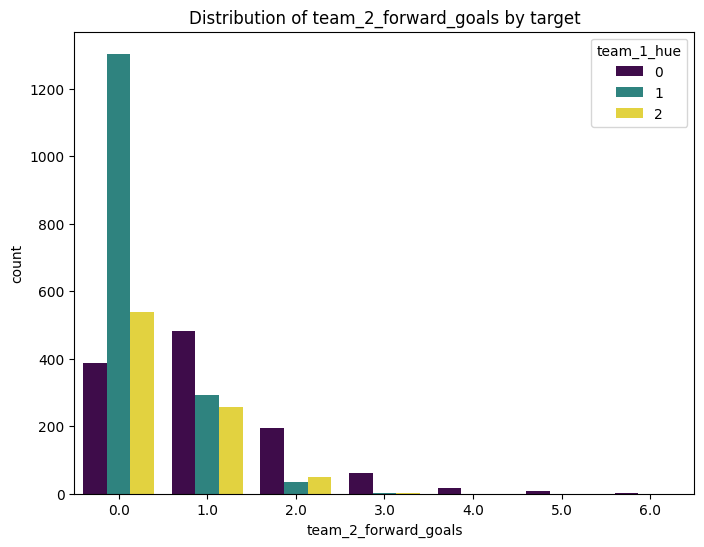

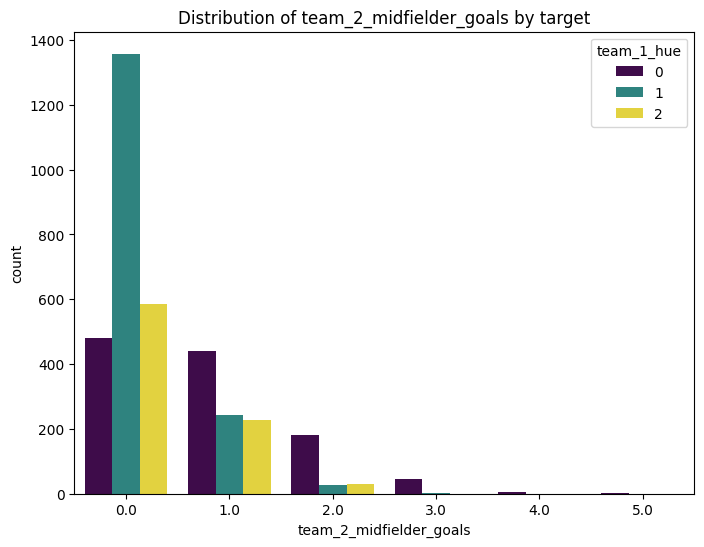

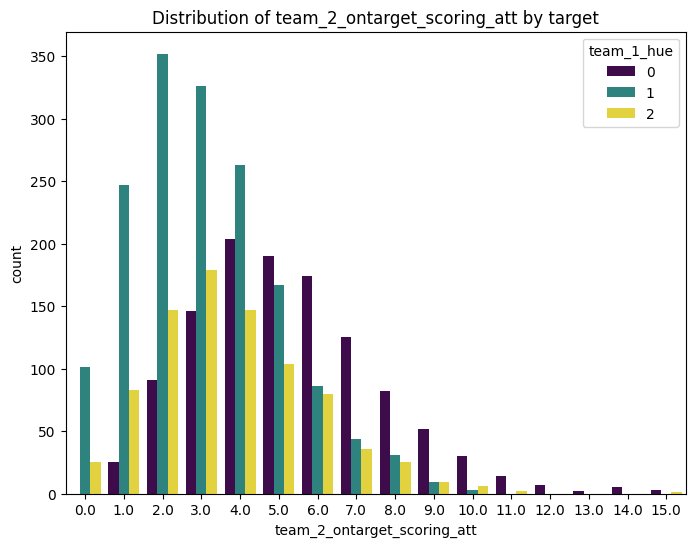

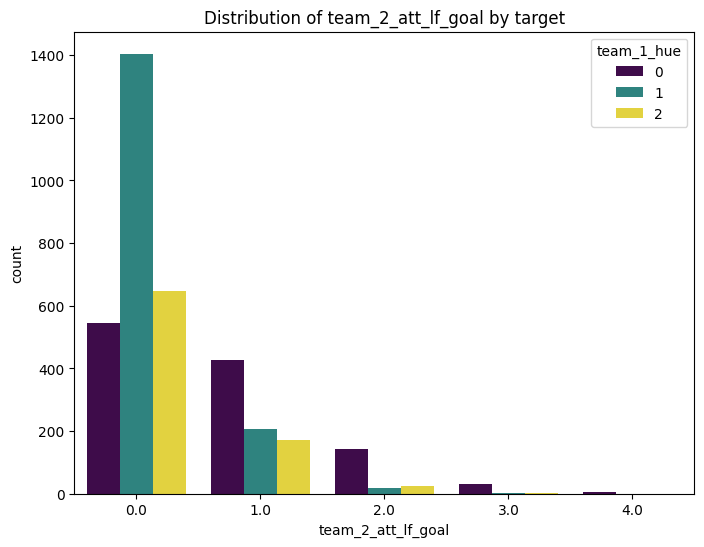

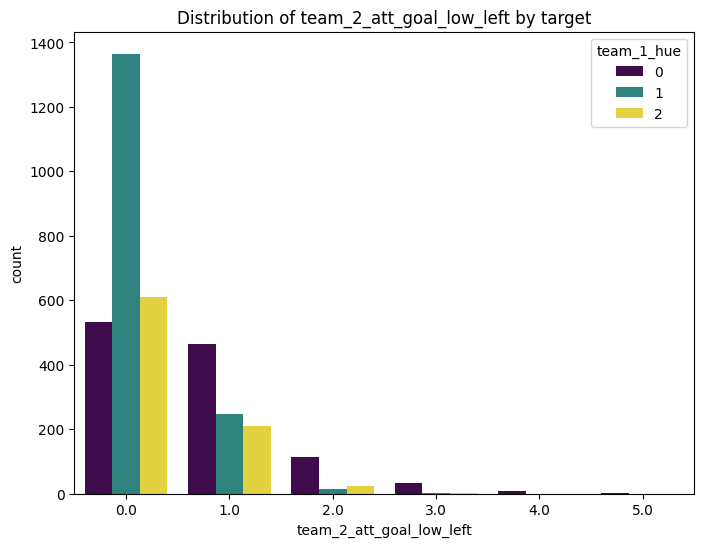

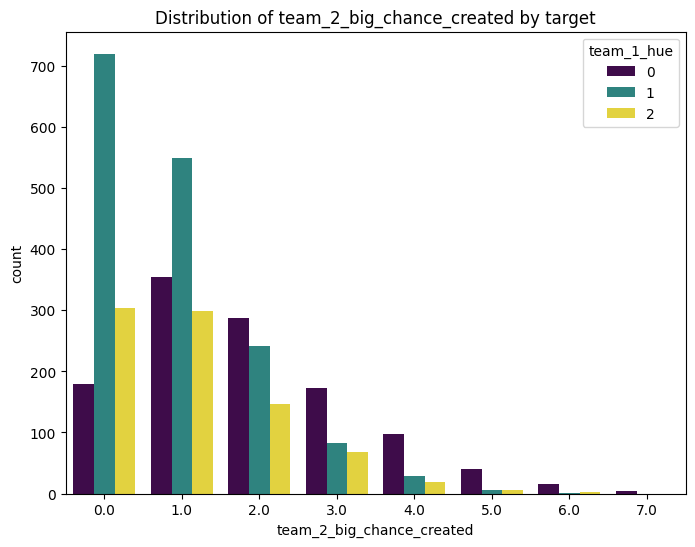

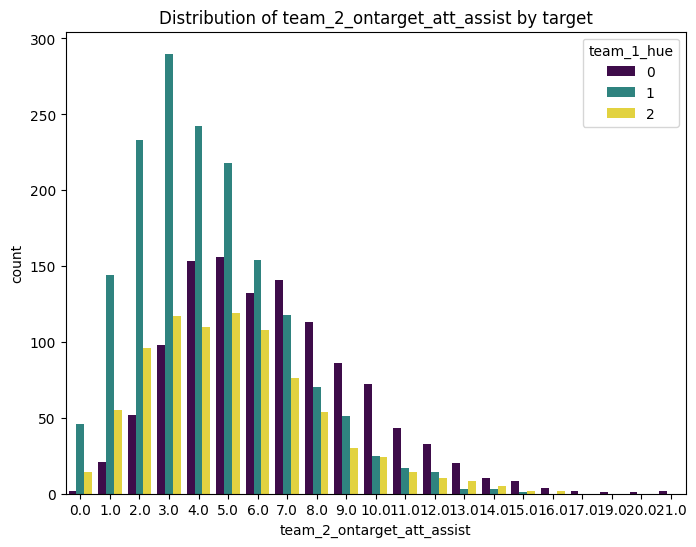

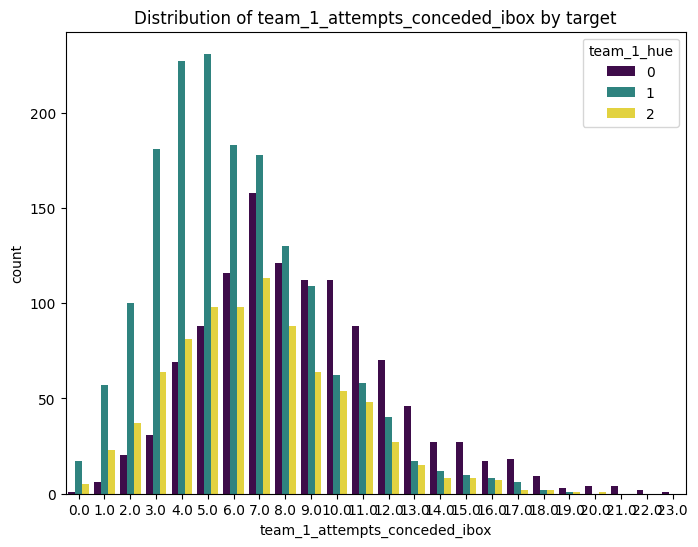

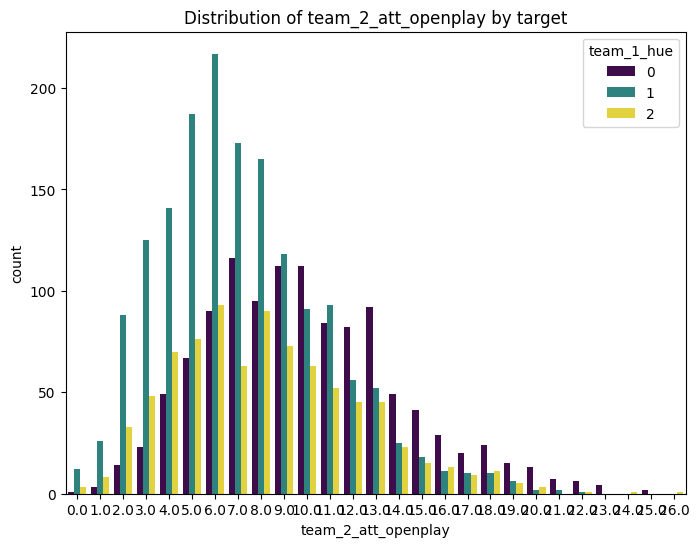

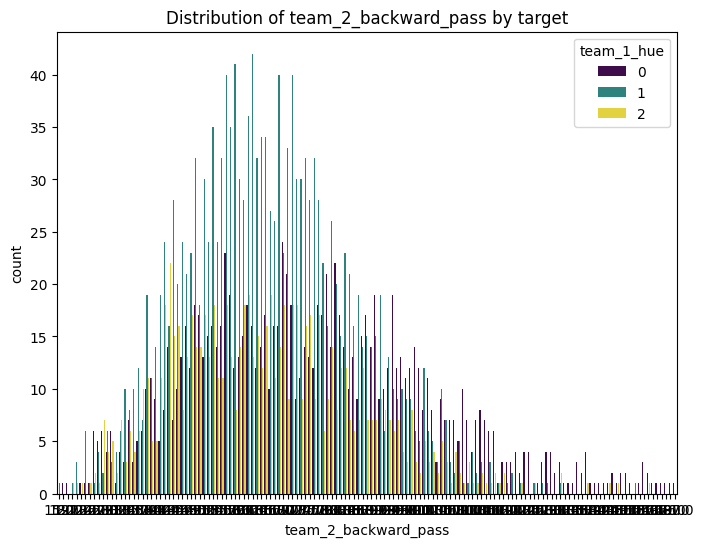

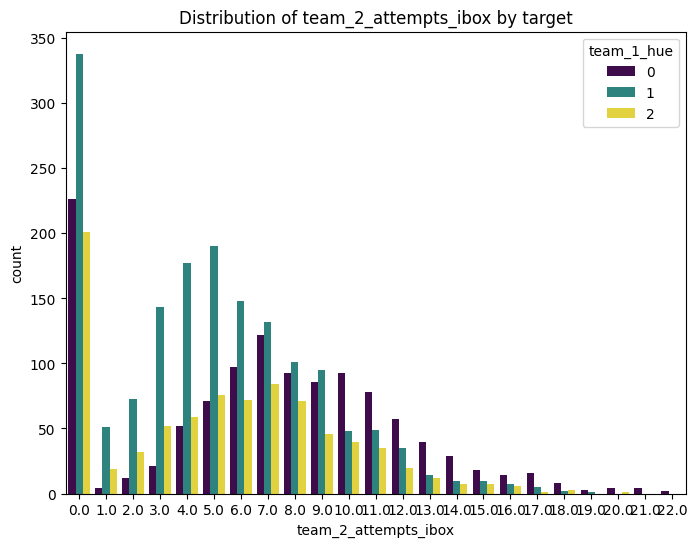

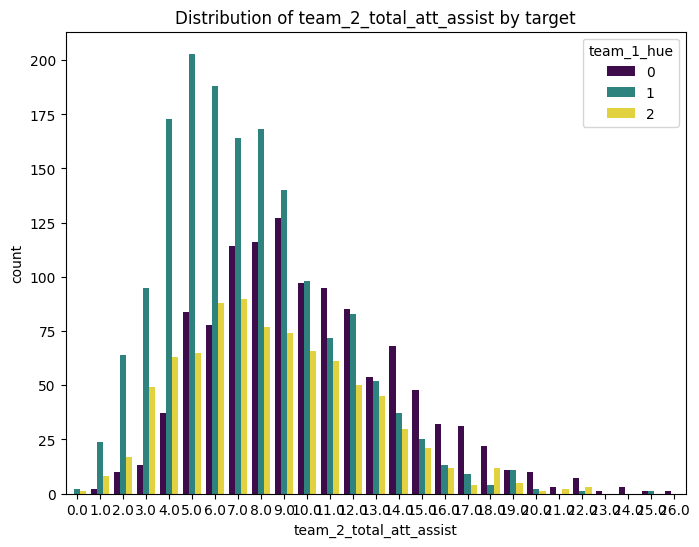

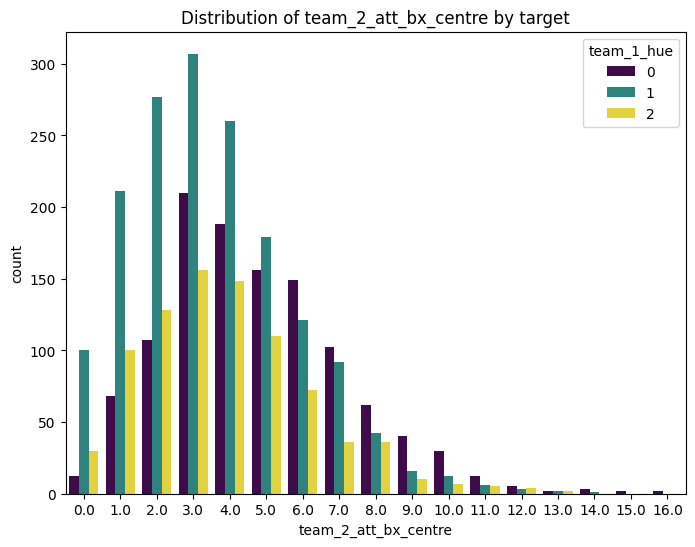

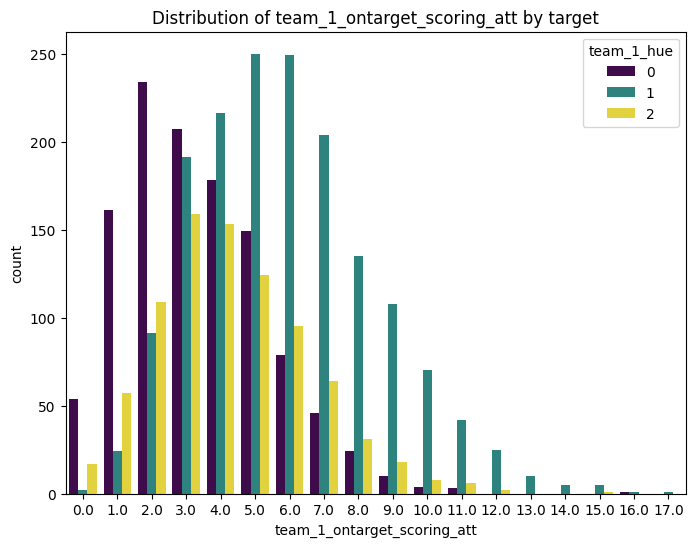

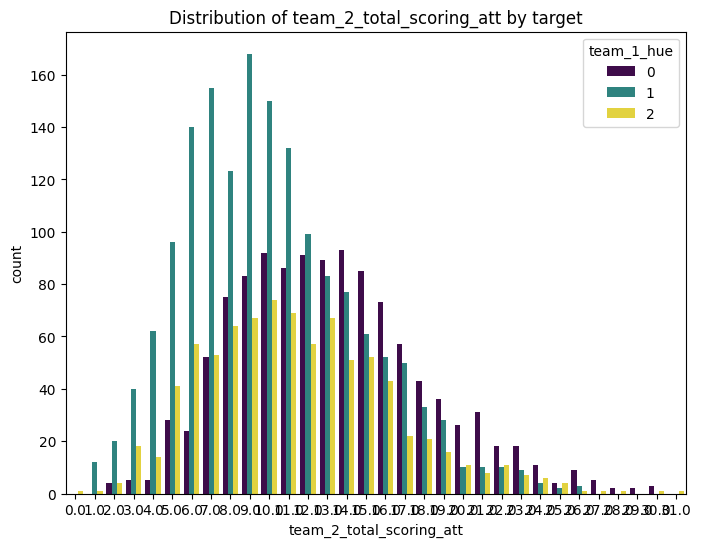

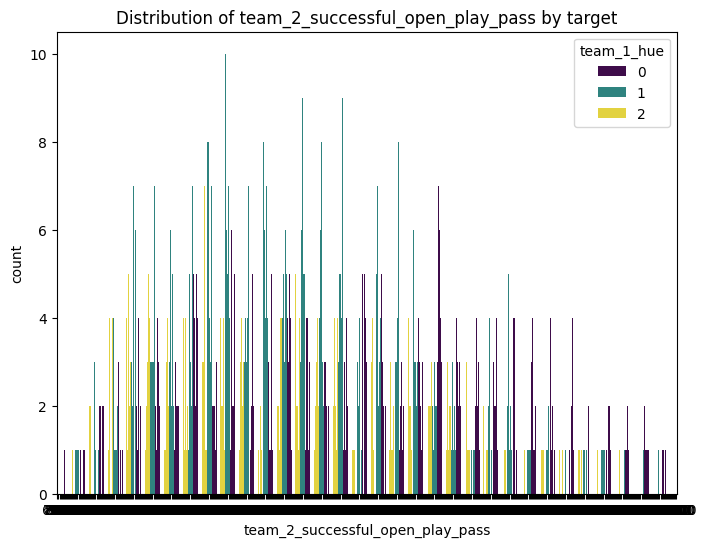

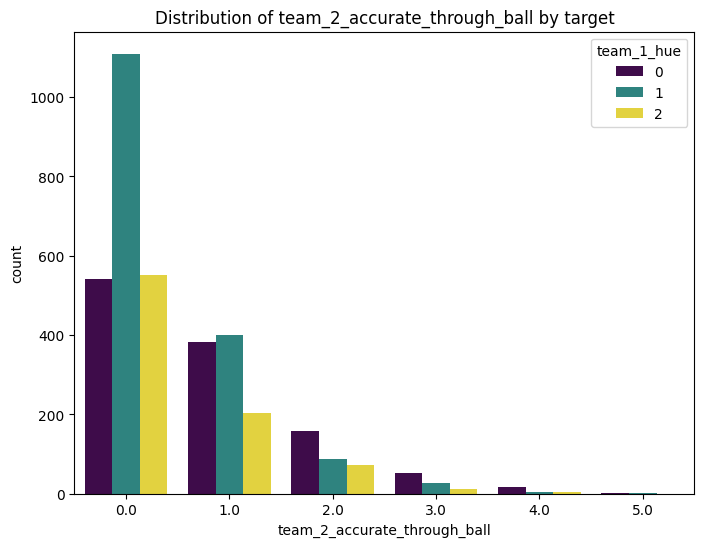

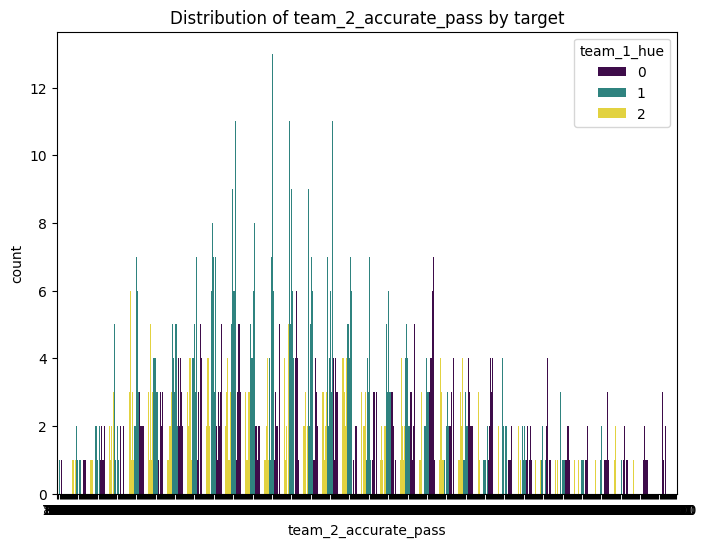

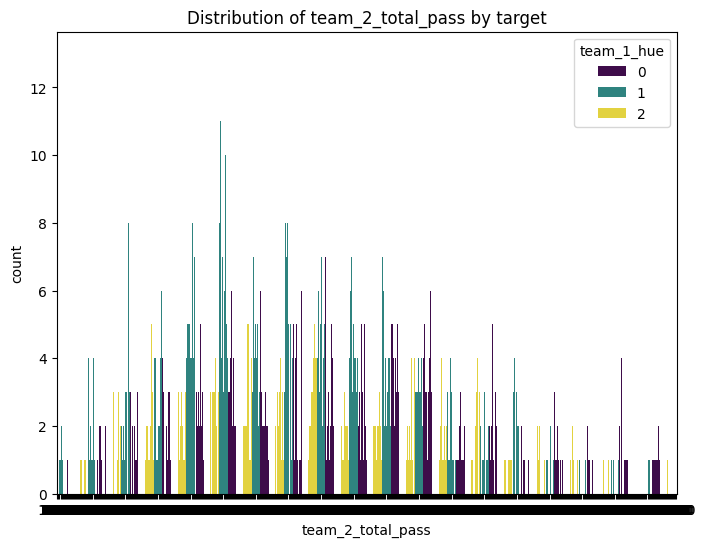

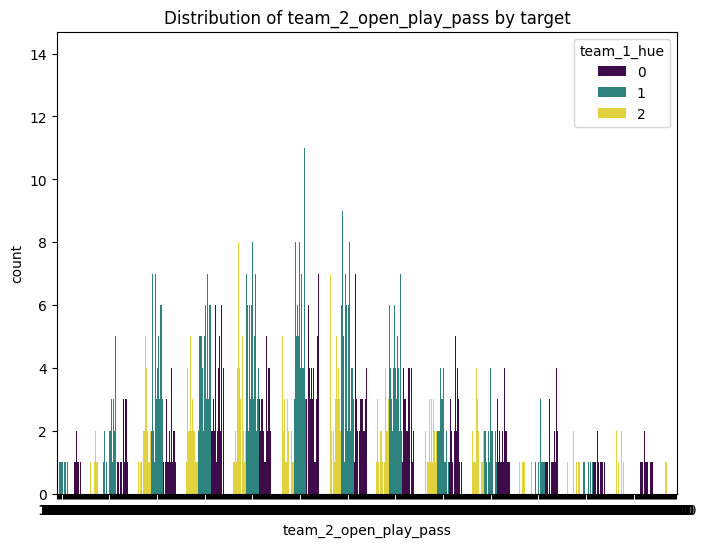

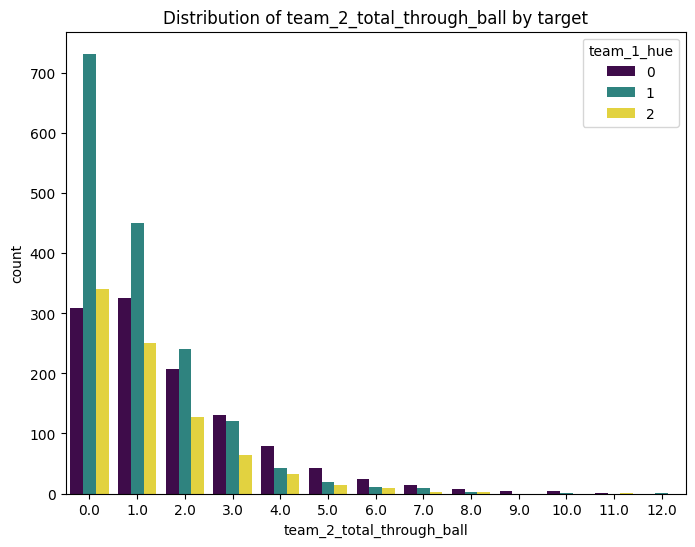

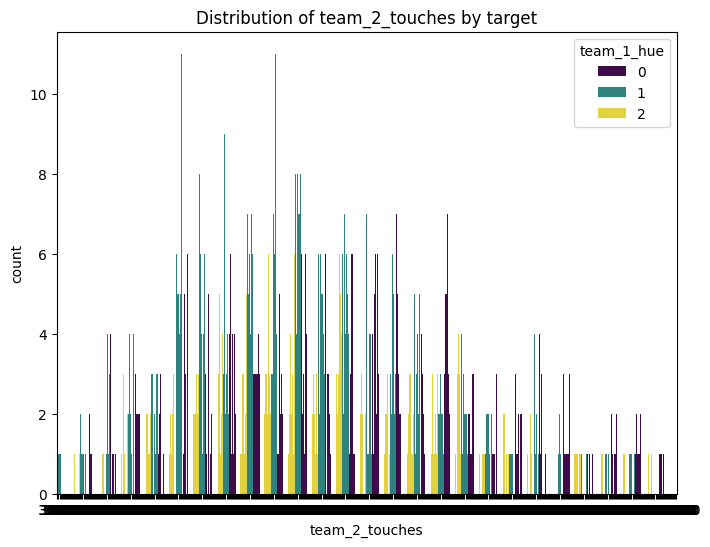

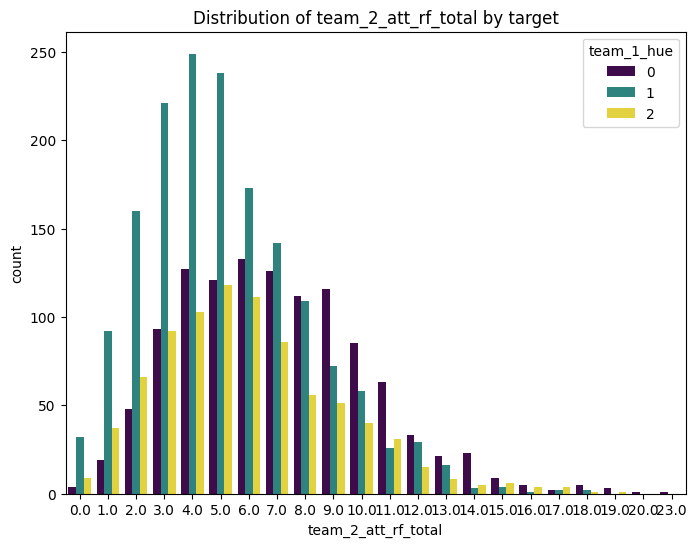

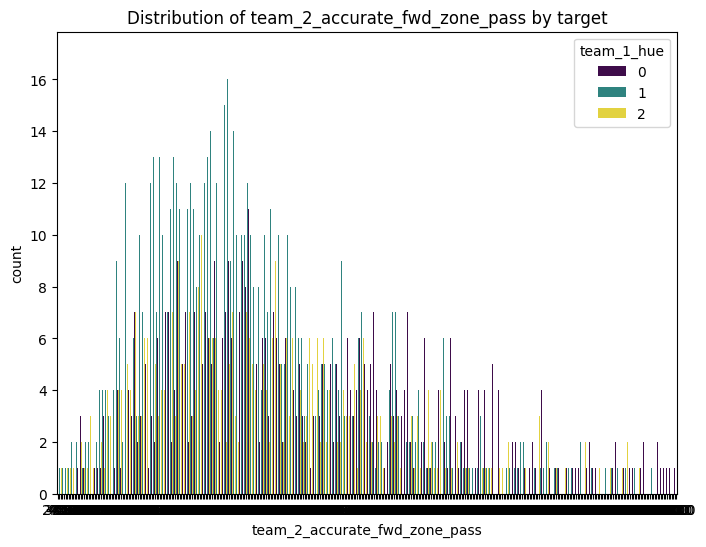

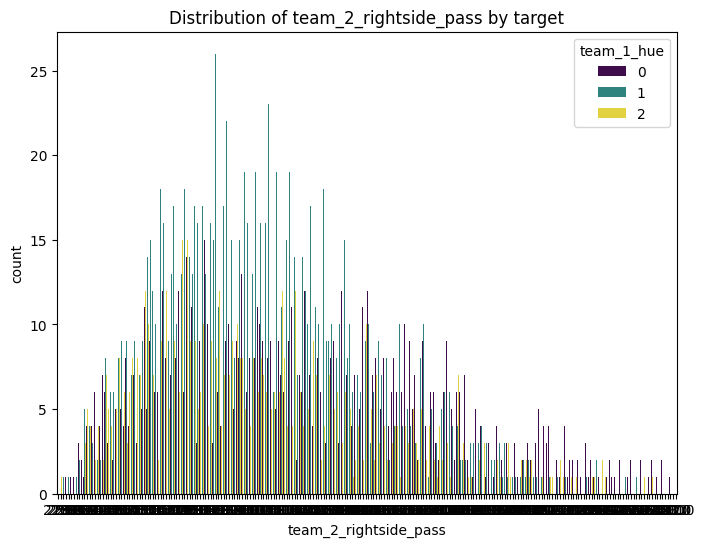

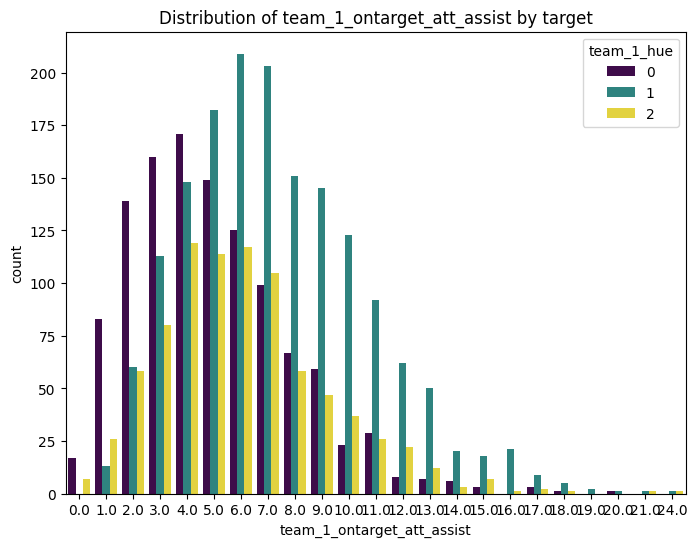

In [67]:
for feature in col_cor:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df, palette='viridis', hue='team_1_hue')
    plt.title(f'Distribution of {feature} by target')
    plt.show()